# I. Definition

## Project Overiview

The Programme for International Student Assessment (PISA) is a worldwide study of 15-year-old school pupils' scholastic performance on mathematics, science, and reading.

In this project, we will predict the reading scores of students using the background information such as parents education, school size, using computer for homework, etc., provided by student and the School. We use PISA 2009 dataset as reading literacy was the main domain assessed in 2009.


## Problem Statement

The goal is to train a model to predict the reading score of student using their demographical information. Since this is a problem of supervised learning of type regression. Several regression algorithms will be explored, as discussed in Phase II, Analysis.

## Metrics

We will use two metrics:
* RMSE(Root Mean Squared Error)
* R^2(R-squared)

# II. Analysis

In [1]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import timeit

# Use average of scores as benchmark
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import model_selection


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


## Data Exploration

### Load the dataset

In [2]:
pisa = pd.read_csv('pisa2009.csv')
print('Shape of dataset: ',pisa.shape)

('Shape of dataset: ', (5233, 24))


## Exploratory Visualization

In [3]:
pisa.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

In [4]:
pisa.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


### Missing Values

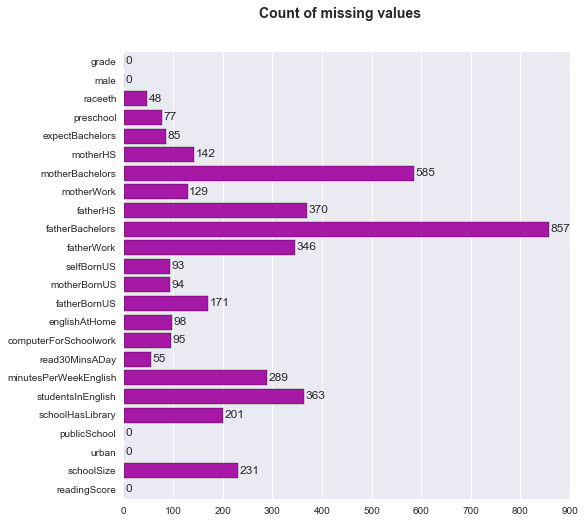

In [5]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Count of missing values', fontsize=14, fontweight='bold')
null_data = pisa.isnull().sum()
ax = sns.barplot(x = null_data.values, y=null_data.index, color="m" )
i = 0
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + 0.5, null_data.values[i])
    i += 1

In [6]:
# Continuous Features
contFeatures = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']
pisa[contFeatures].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
count,4944.000000,4870.000000,5002.000000
mean,265.717840,24.559754,1374.367653
std,149.591118,7.139661,870.424790
min,0.000000,1.000000,100.000000
25%,225.000000,20.000000,712.000000
50%,250.000000,25.000000,1233.000000
75%,300.000000,30.000000,1900.000000
max,2400.000000,90.000000,6694.000000


The max value of * minutesPerWeekEnglish * is very fary from the 75th percentile

### Outliers

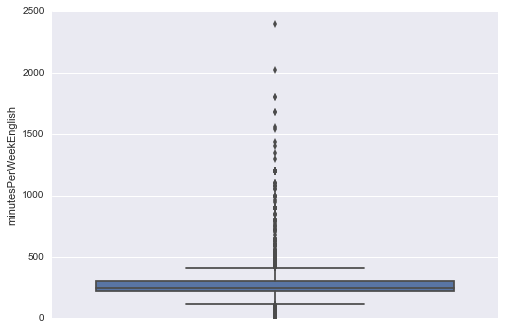

In [7]:
sns.boxplot(y=pisa["minutesPerWeekEnglish"])

In [8]:
pisa['minutesPerWeekEnglish'].describe()

count    4944.000000
mean      265.717840
std       149.591118
min         0.000000
25%       225.000000
50%       250.000000
75%       300.000000
max      2400.000000
Name: minutesPerWeekEnglish, dtype: float64

The boxplot confirms the outlier.  The max value is 2400 minutes (40 hours) per week of English classes. It's not normal as students has other classes to attend.

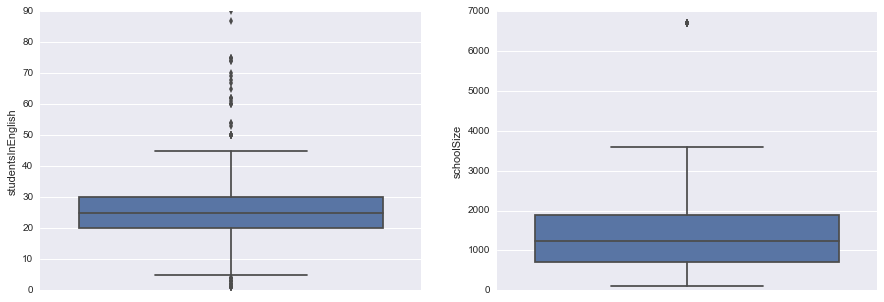

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.boxplot(y= pisa["studentsInEnglish"], ax=ax[0])
sns.boxplot(y= pisa["schoolSize"], ax=ax[1])

For 'studentsInEnglish' and 'schoolSize', the outliers are not a big  concern here as both min and max values are in acceptable range for the number of students in the class and school.

### Bivariate plots on continuous predictors

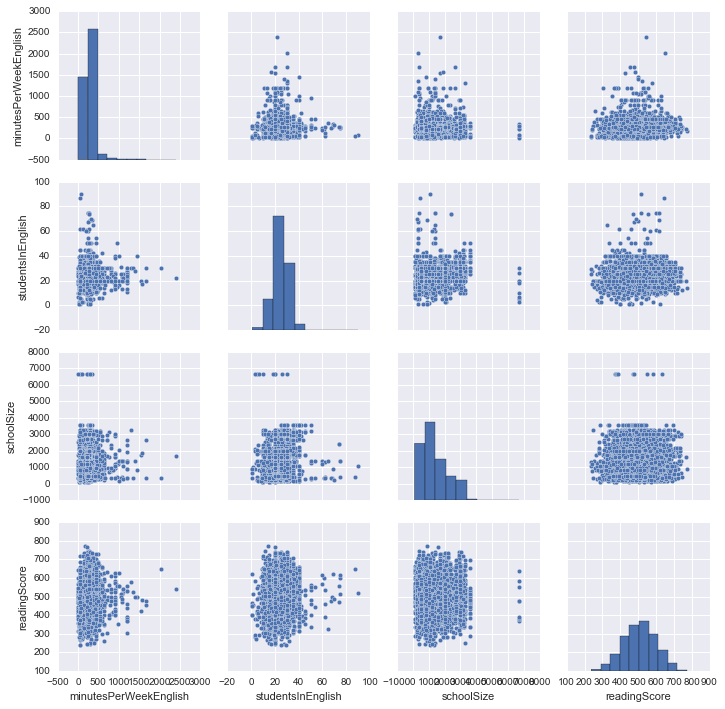

In [10]:
_ = sns.pairplot(pisa[contFeatures + ['readingScore']].dropna())

In [11]:
pisa.minutesPerWeekEnglish.describe()

count    4944.000000
mean      265.717840
std       149.591118
min         0.000000
25%       225.000000
50%       250.000000
75%       300.000000
max      2400.000000
Name: minutesPerWeekEnglish, dtype: float64

### Correlation

In [12]:
from IPython.display import display
tempdf = pisa.copy()

raceeth = pd.get_dummies(tempdf['raceeth'], 'r')
tempdf = pd.concat([tempdf, raceeth], axis=1)
tempdf = tempdf.drop('raceeth', axis=1)

#move the prediction target towards the end
tempdf = tempdf.drop('readingScore', axis=1)
tempdf['readingScore'] = pisa['readingScore']

raceeth
corr = tempdf.corr(method='pearson')
with pd.option_context('display.max_columns', None):
    display(corr)

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,r_American Indian/Alaska Native,r_Asian,r_Black,r_Hispanic,r_More than one race,r_Native Hawaiian/Other Pacific Islander,r_White,readingScore
grade,1.000000,-0.089213,-0.011200,0.148041,0.028976,0.043972,0.042522,0.068751,0.056805,0.010012,-0.015076,-0.062865,-0.057618,-0.009583,0.105568,0.065484,0.045747,0.074487,-0.016703,-0.059306,0.080561,0.063289,-0.023408,0.084707,-0.033769,-0.013163,-0.005996,0.029203,0.004317,0.272413
male,-0.089213,1.000000,0.005507,-0.088671,0.031166,0.048206,-0.016717,0.016752,0.057838,0.030472,0.013215,0.002977,0.012652,-0.005748,-0.028993,-0.214101,0.009808,-0.036348,0.022453,-0.075265,0.016113,-0.004586,0.022623,-0.023206,-0.010602,0.015579,-0.008216,0.019584,-0.000760,-0.145303
preschool,-0.011200,0.005507,1.000000,0.095978,0.140893,0.154680,0.069062,0.137600,0.146597,0.054756,0.093149,0.110534,0.113289,0.122812,0.094145,-0.003884,-0.012829,-0.030150,0.029039,-0.076767,-0.056366,-0.024381,-0.002954,-0.001570,0.039726,-0.120714,0.000731,-0.001656,0.077568,0.060373
expectBachelors,0.148041,-0.088671,0.095978,1.000000,0.109735,0.174178,0.070219,0.151738,0.208115,0.023476,-0.002508,0.009766,0.009201,0.035530,0.132233,0.125497,0.008403,0.041987,0.055405,-0.113289,0.006144,0.021538,-0.032191,0.062091,-0.008816,-0.088334,-0.000554,0.003074,0.064732,0.359425
motherHS,0.028976,0.031166,0.140893,0.109735,1.000000,0.252665,0.170211,0.509090,0.229883,0.036855,0.176047,0.344936,0.337395,0.376071,0.182245,0.020236,0.031403,-0.042705,0.021296,-0.074333,-0.116650,-0.089987,-0.004978,-0.044241,0.062062,-0.348739,0.024971,0.006369,0.260682,0.161376
motherBachelors,0.043972,0.048206,0.154680,0.174178,0.252665,1.000000,0.133704,0.210307,0.539321,0.067062,0.028062,0.140357,0.119619,0.160095,0.144212,0.033012,0.017249,-0.043409,0.022864,-0.172575,-0.040708,-0.007501,-0.023187,0.010866,-0.000595,-0.206743,0.007320,-0.006831,0.173525,0.213743
motherWork,0.042522,-0.016717,0.069062,0.070219,0.170211,0.133704,1.000000,0.115492,0.046268,0.054015,0.067138,0.102452,0.094600,0.121524,0.091743,-0.027740,0.022426,-0.011111,-0.007515,-0.025414,-0.027873,-0.047528,-0.021544,-0.025607,0.041216,-0.102118,0.013330,-0.005968,0.071580,0.047248
fatherHS,0.068751,0.016752,0.137600,0.151738,0.509090,0.210307,0.115492,1.000000,0.281755,0.107036,0.150403,0.298765,0.320266,0.336876,0.170892,0.046933,0.036223,-0.020973,0.036179,-0.086946,-0.100400,-0.083902,-0.018314,0.017634,0.044931,-0.339347,0.019806,0.017167,0.241250,0.188446
fatherBachelors,0.056805,0.057838,0.146597,0.208115,0.229883,0.539321,0.046268,0.281755,1.000000,0.108559,-0.008772,0.068955,0.072586,0.125238,0.172355,0.057101,0.008416,-0.031457,0.006428,-0.188413,-0.007594,0.031286,-0.044834,0.072559,-0.062323,-0.202203,-0.012158,-0.011727,0.192768,0.260840
fatherWork,0.010012,0.030472,0.054756,0.023476,0.036855,0.067062,0.054015,0.107036,0.108559,1.000000,-0.024228,-0.004170,-0.007727,0.013639,0.083243,-0.012241,0.023599,0.003508,-0.003134,-0.020203,-0.029030,-0.022164,-0.042797,-0.010644,-0.095892,-0.020836,-0.014122,-0.033243,0.102633,0.067909


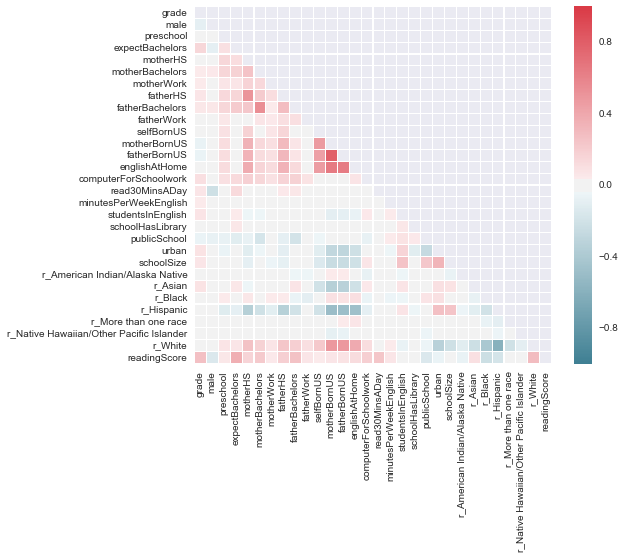

In [13]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
#
# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmax=1,
            square=True,linewidths=.1, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

In [14]:
cor_dict = corr['readingScore'].to_dict()
del cor_dict['readingScore']
print("List the numerical features decendingly by their correlation with Reading Score:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("%21s: %.3f" %(ele))

List the numerical features decendingly by their correlation with Reading Score:

      expectBachelors: 0.359
              r_White: 0.291
                grade: 0.272
      fatherBachelors: 0.261
       read30MinsADay: 0.241
              r_Black: -0.225
      motherBachelors: 0.214
computerForSchoolwork: 0.190
             fatherHS: 0.188
           r_Hispanic: -0.185
             motherHS: 0.161
                 male: -0.145
         publicSchool: -0.141
        englishAtHome: 0.121
              r_Asian: 0.096
         fatherBornUS: 0.085
r_American Indian/Alaska Native: -0.070
minutesPerWeekEnglish: 0.068
           fatherWork: 0.068
         motherBornUS: 0.066
                urban: -0.062
            preschool: 0.060
           motherWork: 0.047
           selfBornUS: 0.039
           schoolSize: 0.035
    studentsInEnglish: 0.033
     schoolHasLibrary: 0.020
r_Native Hawaiian/Other Pacific Islander: 0.014
 r_More than one race: -0.000


### Bivariate visualizations

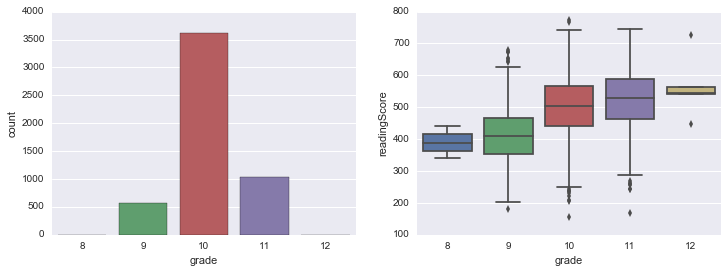

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.countplot(x='grade', data=pisa, ax=ax[0])
sns.boxplot(x='grade', y='readingScore', data=pisa, ax=ax[1])
plt.show()

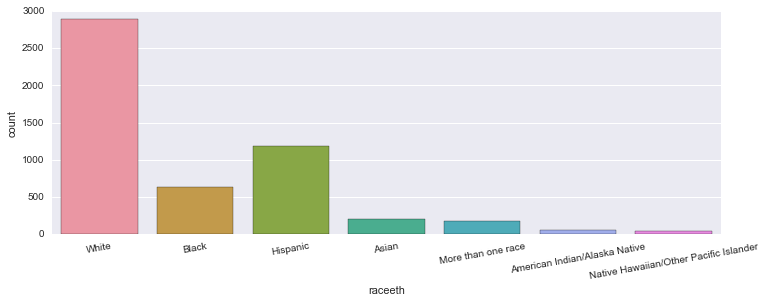

In [16]:
fig = plt.figure(figsize=(12, 4))
sns.countplot(x='raceeth', data=pisa)
a = plt.xticks(rotation = 10)

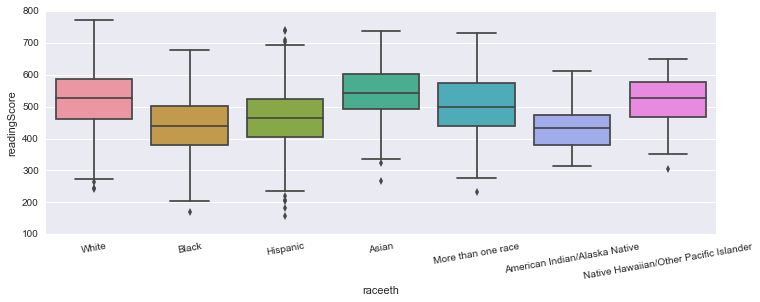

In [17]:
fig = plt.figure(figsize=(12, 4))
sns.boxplot(x='raceeth', y='readingScore', data=pisa)
x = plt.xticks(rotation = 10)
plt.show()

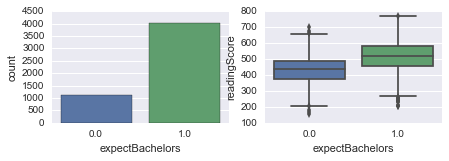

In [18]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='expectBachelors', data=pisa, ax=ax[0])
sns.boxplot(x='expectBachelors', y='readingScore', data=pisa, ax=ax[1])
plt.show()

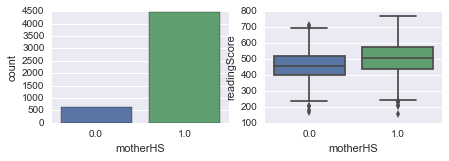

In [19]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherHS', data=pisa, ax=ax[0])
sns.boxplot(x='motherHS', y='readingScore', data=pisa, ax=ax[1])
plt.show()

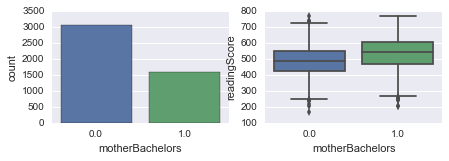

In [20]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherBachelors', data=pisa, ax=ax[0])
sns.boxplot(x='motherBachelors', y='readingScore', data=pisa, ax=ax[1])
plt.show()

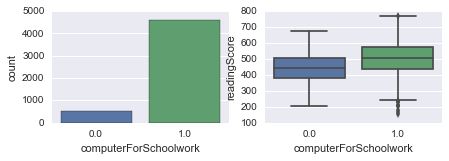

In [21]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='computerForSchoolwork', data=pisa, ax=ax[0])
sns.boxplot(x='computerForSchoolwork', y='readingScore', data=pisa, ax=ax[1])
plt.show()

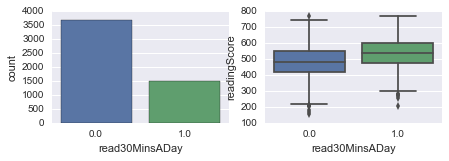

In [22]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='read30MinsADay', data=pisa, ax=ax[0])
sns.boxplot(x='read30MinsADay', y='readingScore', data=pisa, ax=ax[1])
plt.show()

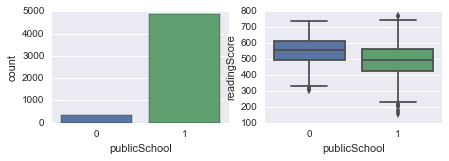

In [23]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='publicSchool', data=pisa, ax=ax[0])
sns.boxplot(x='publicSchool', y='readingScore', data=pisa, ax=ax[1])
plt.show()

## Algorithms and Techniques

### Split into train and test sets

In [56]:
from sklearn.model_selection import train_test_split
pisa = pd.read_csv('pisa2009.csv')
X = pisa.drop('readingScore', axis=1)
y = pisa['readingScore']
del pisa
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Benchmark

In [57]:
# Use average of scores as benchmark
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import LabelEncoder

X_train_bm = X_train.copy()
X_test_bm = X_test.copy()

X_train_bm = X_train_bm.drop('raceeth', axis=1)
X_test_bm = X_test_bm.drop('raceeth', axis=1)

X_train_bm = X_train_bm.apply(lambda x:x.fillna(0))
X_test_bm = X_test_bm.apply(lambda x:x.fillna(0))


model = LinearRegression()
model.fit(X_train_bm, y_train)

print "r2 score: %.2f" % r2_score(y_test, model.predict(X_test_bm))
print "RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, model.predict(X_test_bm)))

r2 score: 0.32
RMSE: 78.36


# 3. Methodology
## 3.1 Data Preprocessing

Merge the training and validation sets for preprocessing

In [58]:
train_size = X_train.shape[0]
pisa = pd.concat([X_train, X_test], ignore_index=True)
del X_train
del X_test

### Handling Missing Values

In [59]:
# For continuous variables replace the missing data with average of columns
pisa['minutesPerWeekEnglish'].fillna(int(pisa['minutesPerWeekEnglish'].mean()), inplace=True)
pisa['studentsInEnglish'].fillna(int(pisa['studentsInEnglish'].mean()), inplace=True)
pisa['schoolSize'].fillna(int(pisa['schoolSize'].mean()), inplace=True)

# For 'raceeth' use 'NoRace' replacement
pisa['raceeth'].fillna('NoRace', inplace=True)
# For binary variable use 0 in place of missing value
pisa = pisa.apply(lambda x:x.fillna(0))


In [60]:
pisa.columns

Index([u'grade', u'male', u'raceeth', u'preschool', u'expectBachelors',
       u'motherHS', u'motherBachelors', u'motherWork', u'fatherHS',
       u'fatherBachelors', u'fatherWork', u'selfBornUS', u'motherBornUS',
       u'fatherBornUS', u'englishAtHome', u'computerForSchoolwork',
       u'read30MinsADay', u'minutesPerWeekEnglish', u'studentsInEnglish',
       u'schoolHasLibrary', u'publicSchool', u'urban', u'schoolSize'],
      dtype='object')

### Binning Continuous Variables

#### minutesPerWeekEnglish

In [61]:

bins = [-1, 100, 200, 300, 400, 2500 ]
group_names = ['<100', '100-200', '200-300', '300-400', '400-2500']
pisa['englishBins'] = pd.cut(pisa['minutesPerWeekEnglish'], bins, labels=group_names)
pisa = pisa.drop('minutesPerWeekEnglish', axis=1)
pisa['englishBins'].value_counts()


200-300     3337
<100         518
400-2500     503
100-200      500
300-400      375
Name: englishBins, dtype: int64

#### studentsInEnglish

In [62]:
bins = [0, 10, 20, 30, 40, 50, 100 ]
group_names = ['<10', '10-20', '20-30', '30-40', '40-50', '50-100']
pisa['englishStudents'] = pd.cut(pisa['studentsInEnglish'], bins, labels=group_names)
pisa = pisa.drop('studentsInEnglish', axis=1)
pisa['englishStudents'].value_counts()

20-30     3105
10-20     1549
30-40      418
<10        116
40-50       23
50-100      22
Name: englishStudents, dtype: int64

#### schoolSize

In [63]:
bins = [0, 100, 500, 1000, 2000, 3000, 7000 ]
group_names = ['<100', '100-500', '500-1000', '1000-2000', '2000-3000', '3000-7000']
pisa['schoolBin'] = pd.cut(pisa['schoolSize'], bins, labels=group_names)
pisa = pisa.drop('schoolSize', axis=1)
pisa['schoolBin'].value_counts()

1000-2000    2096
500-1000     1251
2000-3000     843
100-500       794
3000-7000     237
<100           12
Name: schoolBin, dtype: int64

### Handling categorical variables

In [64]:
# Encode categorical data
raceeth = pd.get_dummies(pisa['raceeth'], 'raceeth')
pisa = pd.concat([pisa, raceeth], axis=1)
pisa = pisa.drop('raceeth', axis=1)

minutes = pd.get_dummies(pisa['englishBins'], 'minutes')
pisa = pd.concat([pisa, minutes], axis=1)
pisa = pisa.drop('englishBins', axis=1)

students = pd.get_dummies(pisa['englishStudents'], 'students')
pisa = pd.concat([pisa, students], axis=1)
pisa = pisa.drop('englishStudents', axis=1)

school = pd.get_dummies(pisa['schoolBin'], 'school')
pisa = pd.concat([pisa, school], axis=1)
pisa = pisa.drop('schoolBin', axis=1)

grade = pd.get_dummies(pisa['grade'], 'grade')
pisa = pd.concat([pisa, school], axis=1)
pisa = pisa.drop('grade', axis=1)

### Handling multicolinearity

In [65]:
# remove multicolinearity marked for removal in exploration phase
pisa = pisa.drop(['motherBachelors','motherBornUS', 'fatherBornUS'], axis=1)

In [66]:
pisa.columns.values

array(['male', 'preschool', 'expectBachelors', 'motherHS', 'motherWork',
       'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'schoolHasLibrary', 'publicSchool', 'urban',
       'raceeth_American Indian/Alaska Native', 'raceeth_Asian',
       'raceeth_Black', 'raceeth_Hispanic', 'raceeth_More than one race',
       'raceeth_Native Hawaiian/Other Pacific Islander', 'raceeth_NoRace',
       'raceeth_White', 'minutes_<100', 'minutes_100-200',
       'minutes_200-300', 'minutes_300-400', 'minutes_400-2500',
       'students_<10', 'students_10-20', 'students_20-30',
       'students_30-40', 'students_40-50', 'students_50-100',
       'school_<100', 'school_100-500', 'school_500-1000',
       'school_1000-2000', 'school_2000-3000', 'school_3000-7000',
       'school_<100', 'school_100-500', 'school_500-1000',
       'school_1000-2000', 'school_2000-3000', 'school_3000-7000'], dtype=object)

### Training Test set split

In [67]:
X_train = pisa.iloc[:train_size,:]
X_test = pisa.iloc[train_size:,:]
print X_train.shape
print X_test.shape

(3663, 46)
(1570, 46)


## 3.2 Implementation

In this section a number of algorithms will be spot checked.  

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

Helper functions

In [69]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, scoring, ylim=None, cv=None):
    
    plt.figure(figsize=(6,3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
    train_sizes = np.linspace(.1, 1.0, 10)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes, scoring= scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    #for size, train_score, test_score in zip(train_sizes, train_scores_mean, test_scores_mean):
    #    print "Train size: %6d, Train Score: %.3f Test Score: %.3f" % (size, train_score, test_score)
    return plt

In [104]:
def spot_check_models(models, X, y):
    
    results_rmse = []
    results_r2 = []
    names = []
    print "%20s: %15s %10s" % ('Model', 'RMSE (std)', 'R2(std)' )
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
        cv_results_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        results_rmse.append(cv_results)
        results_r2.append(cv_results_r2)
        names.append(name)
        msg = "%20s: %7.3f (%.3f)  %7.3f (%.3f)" % \
        (name, cv_results.mean(), cv_results.std(), cv_results_r2.mean(), cv_results_r2.std())
        print(msg)

In [71]:
def print_score(y_train, y_pred_train, y_test, y_pred_test):
    '''
    Print the RMSE and R^2 scores for train and test predictions
    '''
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    results_list = ['Train', 'Test']
    mae_both =[mae_train, mae_test]
    r2_both = [r2_train, r2_test]
    
    print '\tRMSE\t\tR2'
    for s, mae, r2 in zip(results_list, mae_both, r2_both):
        print '{0:10}\t{1:.3f}\t\t{2:.3f}'.format(s, mae, 2)

In [105]:
models = []
models.append(('Bayesian Ridge', BayesianRidge()))
models.append(('SupprtVector', SVR(kernel='linear')))
models.append(('GradientBoost', GradientBoostingRegressor() ))
models.append(('RandomForests', RandomForestRegressor() ))
spot_check_models(models, X_train, y_train)

               Model:      RMSE (std)    R2(std)
      Bayesian Ridge:  78.535 (3.192)    0.323 (0.037)
        SupprtVector:  78.787 (3.081)    0.319 (0.034)
       GradientBoost:  78.491 (3.547)    0.323 (0.038)
       RandomForests:  87.785 (2.577)    0.157 (0.071)


### Learning curves

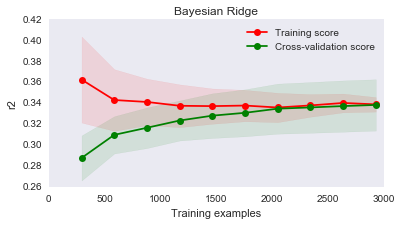

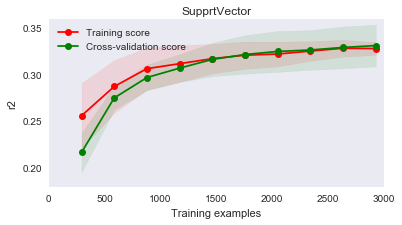

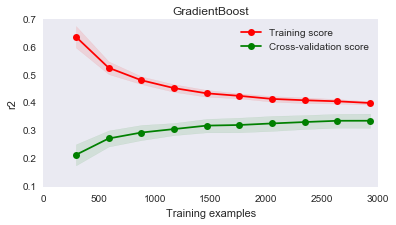

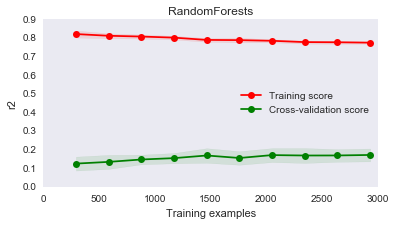

In [73]:
for name, model in models:
    plot_learning_curve(model,name, X_train, y_train, 'r2')

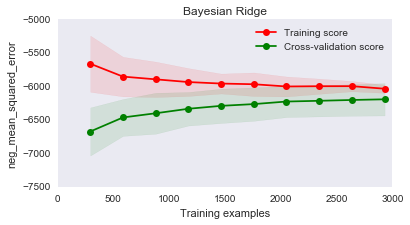

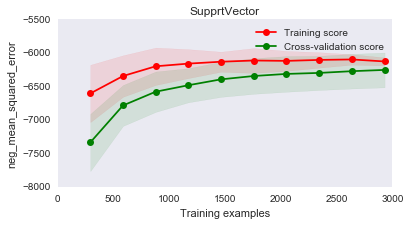

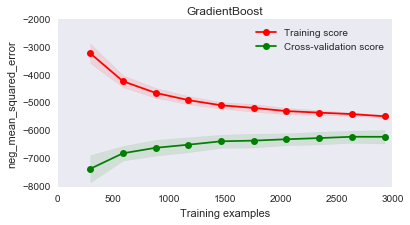

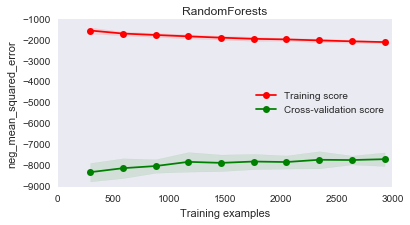

In [74]:
for name, model in models:
    plot_learning_curve(model,name, X_train, y_train, 'neg_mean_squared_error')

### Verify with test set

In [75]:
for name, model in models:
    model.fit(X_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2 = r2_score(y_test, model.predict(X_test))   
           
    print "%15s RMSE: %.2f r2 score: %.2f" % (name, rmse, r2 )

    

 Bayesian Ridge RMSE: 76.96 r2 score: 0.34
   SupprtVector RMSE: 77.20 r2 score: 0.34
  GradientBoost RMSE: 75.69 r2 score: 0.37
  RandomForests RMSE: 83.76 r2 score: 0.22


The benchmark scores were: RMSE: 78.36 and  r2 score: 0.32. The improvements were minimal.

## 3.3 Refinement

### 3.3.1. Feature selction

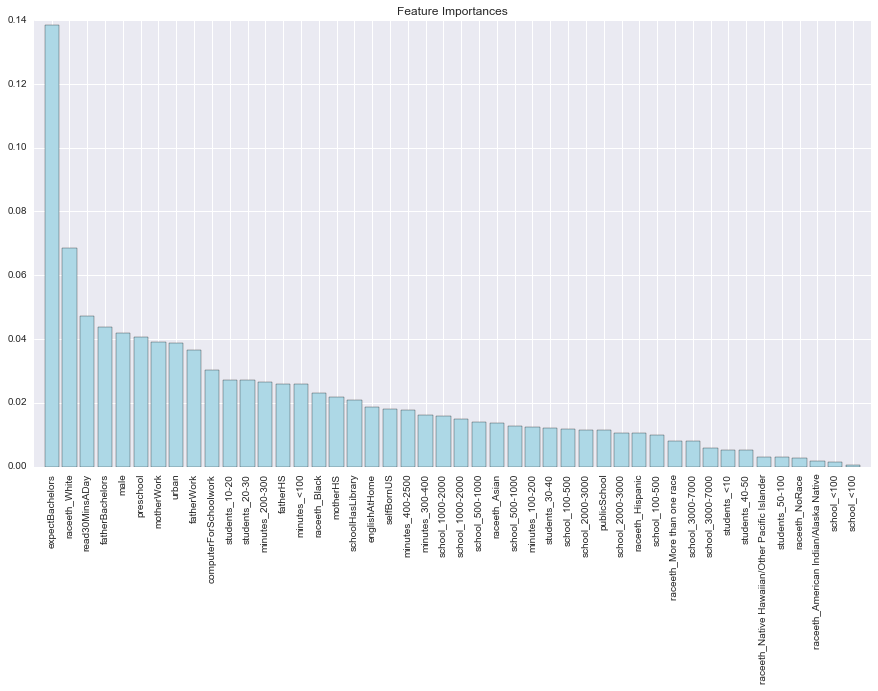

In [77]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_
feat_sel_indices = np.argsort(importances)[::-1]
feature_labels = pisa.columns
labels_reordered = [feature_labels[i] for i in feat_sel_indices]
plt.figure(figsize=(15,8)) 
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[feat_sel_indices],color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), labels_reordered, rotation=90)
plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
plt.show()

In [86]:
for n_features in range(1, len(feat_sel_indices)):
    features = feat_sel_indices[:n_features]
    model = GradientBoostingRegressor()
    kfold = KFold(n_splits=10, random_state=7)
    rmse = np.mean(np.sqrt(-cross_val_score(model, X_train[features], y_train, cv=kfold, scoring='neg_mean_squared_error')))
    r2 = np.mean(cross_val_score(model, X_train[features], y_train, cv=kfold, scoring='r2'))  
           
    print "Top %2d features RMSE: %.2f r2 score: %.2f" % (n_features, rmse, r2 )

Top  1 features RMSE: 89.29 r2 score: 0.13
Top  2 features RMSE: 85.89 r2 score: 0.19
Top  3 features RMSE: 83.80 r2 score: 0.23
Top  4 features RMSE: 82.55 r2 score: 0.25
Top  5 features RMSE: 82.07 r2 score: 0.26
Top  6 features RMSE: 82.03 r2 score: 0.26
Top  7 features RMSE: 82.12 r2 score: 0.26
Top  8 features RMSE: 82.05 r2 score: 0.26
Top  9 features RMSE: 82.02 r2 score: 0.26
Top 10 features RMSE: 81.47 r2 score: 0.27
Top 11 features RMSE: 81.40 r2 score: 0.27
Top 12 features RMSE: 81.35 r2 score: 0.27
Top 13 features RMSE: 81.30 r2 score: 0.28
Top 14 features RMSE: 81.19 r2 score: 0.28
Top 15 features RMSE: 80.45 r2 score: 0.29
Top 16 features RMSE: 79.55 r2 score: 0.31
Top 17 features RMSE: 79.51 r2 score: 0.31
Top 18 features RMSE: 79.20 r2 score: 0.31
Top 19 features RMSE: 79.09 r2 score: 0.31
Top 20 features RMSE: 79.08 r2 score: 0.31
Top 21 features RMSE: 79.21 r2 score: 0.31
Top 22 features RMSE: 79.01 r2 score: 0.31
Top 23 features RMSE: 79.04 r2 score: 0.31
Top 24 feat

In [115]:
selected_features = feat_sel_indices[:37]

In [116]:
spot_check_models(models, X_train[selected_features], y_train)

               Model:      RMSE (std)    R2(std)
      Bayesian Ridge:  78.535 (3.192)    0.323 (0.037)
        SupprtVector:  78.787 (3.081)    0.319 (0.034)
       GradientBoost:  78.500 (3.549)    0.324 (0.037)
       RandomForests:  87.447 (3.060)    0.155 (0.078)


### 3.3.2 Selecting hyperparameters

In [49]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, X, y, param_name, param_range, 
                          scoring, plot_title, x_label, y_label, n_jobs=-1):
    
    cv = ShuffleSplit( test_size=0.2, random_state=7)
    
    start = timeit.default_timer()
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range,
                                                 cv=cv, scoring=scoring, n_jobs=n_jobs)
    stop = timeit.default_timer()
    print 'Validation Curves Runtime: %d seconds' % (stop-start)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Print Scores
    for param, train_score, test_score in zip(param_range, train_scores_mean, test_scores_mean):
        print ('{0}: {1:7d}    Train Score: {2:.3f} Test Score: {3:.3f}' .format(param_name, int(param), float(train_score), float(test_score)))
    
    plt.figure(figsize=(5,3))
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.show()

In [50]:
def grid_search_validation_curve(estimator, X, y, param_name, param_value, scoring):
    param_grid = {}
    param_grid[param_name] = param_value

    kfold = KFold(n_splits=5, random_state=7)
    grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X, y)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    plot_validation_curve(model, X_train, y_train, param_name, param_value, 'r2',
                          'validation curve - '+estimator.__class__.__name__ , param_name,scoring )

In [76]:
from sklearn.model_selection import GridSearchCV
def select_hyperparams(**kwargs):
        
    X_train = kwargs['X_train']
    y_train = kwargs['y_train']
    X_test  = kwargs["X_test"]
    y_test  = kwargs["y_test"]

    
    model = kwargs['model']
    name  = kwargs['name']
    param_grid = kwargs['param_grid']
    scoring_func= kwargs['scoring_func']
    
    start = timeit.default_timer()
    # Use nested cross validation - 5x2 cross validation
    model_gs = GridSearchCV(estimator=model,param_grid=param_grid,
                  scoring=scoring_func, cv=2, n_jobs=-1)
   
    scores = cross_val_score(estimator=model_gs, X=X_train, y=y_train,
                             scoring=scoring_func, cv=5)

    model_gs = model_gs.fit(X=X_train, y=y_train)
    
    stop = timeit.default_timer()
    print 'GridSearchCV Runtime: %d seconds' % (stop-start)

    print 'All CV Scores:', scores
    print('Mean CV Score: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    print 'Best Estimator:\n', model_gs.best_estimator_

#### Hyperparameters for Gradient Boosting Regressor
* learning_rate
* n_estimators
* max_depth
* min_samples_split
* min_samples_leaf
* subsample

Best: 0.326559 using {'learning_rate': 0.1}
0.218444 (0.006967) with: {'learning_rate': 0.01}
0.326559 (0.029758) with: {'learning_rate': 0.1}
0.322843 (0.031968) with: {'learning_rate': 0.15}
0.318268 (0.029297) with: {'learning_rate': 0.2}
0.304490 (0.036147) with: {'learning_rate': 0.3}
0.295614 (0.030969) with: {'learning_rate': 0.35}
0.289722 (0.030572) with: {'learning_rate': 0.4}
0.273032 (0.028126) with: {'learning_rate': 0.5}
0.254427 (0.037890) with: {'learning_rate': 0.6}
0.246309 (0.050969) with: {'learning_rate': 0.7}
Validation Curves Runtime: 42 seconds
learning_rate:       0    Train Score: 0.237 Test Score: 0.210
learning_rate:       0    Train Score: 0.406 Test Score: 0.316
learning_rate:       0    Train Score: 0.424 Test Score: 0.317
learning_rate:       0    Train Score: 0.437 Test Score: 0.312
learning_rate:       0    Train Score: 0.462 Test Score: 0.300
learning_rate:       0    Train Score: 0.472 Test Score: 0.289
learning_rate:       0    Train Score: 0.480 Te

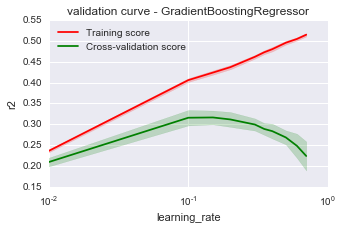

In [126]:
learning_rate = [0.01,0.1,0.15,0.2,0.3,0.35,0.4,0.5,0.6,0.7]
model = GradientBoostingRegressor(random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='learning_rate',
                             param_value=learning_rate, scoring='r2')

Best: 0.326724 using {'n_estimators': 150}
0.321020 (0.025580) with: {'n_estimators': 50}
0.326559 (0.029758) with: {'n_estimators': 100}
0.326724 (0.031697) with: {'n_estimators': 150}
0.322301 (0.032267) with: {'n_estimators': 200}
0.317594 (0.034048) with: {'n_estimators': 250}
0.312888 (0.033671) with: {'n_estimators': 300}
0.309023 (0.034328) with: {'n_estimators': 350}
0.305200 (0.034738) with: {'n_estimators': 400}
0.300638 (0.034600) with: {'n_estimators': 450}
0.297084 (0.034434) with: {'n_estimators': 500}
0.293400 (0.034802) with: {'n_estimators': 550}
Validation Curves Runtime: 52 seconds
n_estimators:      50    Train Score: 0.374 Test Score: 0.311
n_estimators:     100    Train Score: 0.406 Test Score: 0.316
n_estimators:     150    Train Score: 0.423 Test Score: 0.317
n_estimators:     200    Train Score: 0.436 Test Score: 0.315
n_estimators:     250    Train Score: 0.446 Test Score: 0.310
n_estimators:     300    Train Score: 0.456 Test Score: 0.307
n_estimators:     35

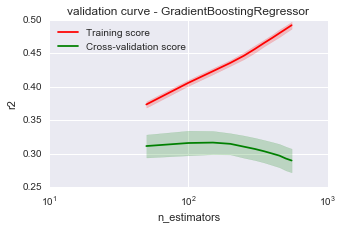

In [127]:
n_estimators = range(50, 600, 50)
model = GradientBoostingRegressor(learning_rate=0.1, random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='n_estimators', param_value=n_estimators, scoring='r2')

Best: 0.327199 using {'max_depth': 2}
0.315010 (0.024813) with: {'max_depth': 1}
0.327199 (0.029590) with: {'max_depth': 2}
0.326724 (0.031697) with: {'max_depth': 3}
0.306415 (0.027069) with: {'max_depth': 4}
0.281365 (0.040867) with: {'max_depth': 5}
0.242039 (0.041387) with: {'max_depth': 6}
0.202558 (0.054396) with: {'max_depth': 7}
0.151187 (0.056341) with: {'max_depth': 8}
0.099181 (0.068665) with: {'max_depth': 9}
0.049241 (0.063191) with: {'max_depth': 10}
Validation Curves Runtime: 77 seconds
max_depth:       1    Train Score: 0.330 Test Score: 0.309
max_depth:       2    Train Score: 0.373 Test Score: 0.319
max_depth:       3    Train Score: 0.423 Test Score: 0.317
max_depth:       4    Train Score: 0.482 Test Score: 0.300
max_depth:       5    Train Score: 0.561 Test Score: 0.280
max_depth:       6    Train Score: 0.649 Test Score: 0.252
max_depth:       7    Train Score: 0.732 Test Score: 0.218
max_depth:       8    Train Score: 0.796 Test Score: 0.185
max_depth:       9   

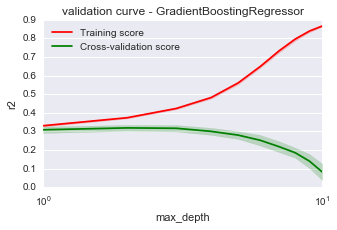

In [128]:
max_depth = range(1, 11)
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='max_depth', param_value=max_depth, scoring='r2')

Best: 0.327199 using {'min_samples_split': 1}
0.327199 (0.029590) with: {'min_samples_split': 1}
0.327199 (0.029590) with: {'min_samples_split': 3}
0.327199 (0.029590) with: {'min_samples_split': 4}
0.327199 (0.029590) with: {'min_samples_split': 5}
0.327199 (0.029590) with: {'min_samples_split': 6}
0.327199 (0.029590) with: {'min_samples_split': 7}
0.327199 (0.029590) with: {'min_samples_split': 8}
0.327199 (0.029590) with: {'min_samples_split': 9}
0.327199 (0.029590) with: {'min_samples_split': 10}
0.327199 (0.029590) with: {'min_samples_split': 15}
0.327199 (0.029590) with: {'min_samples_split': 20}
0.327199 (0.029590) with: {'min_samples_split': 30}
Validation Curves Runtime: 21 seconds
min_samples_split:       1    Train Score: 0.373 Test Score: 0.319
min_samples_split:       3    Train Score: 0.373 Test Score: 0.319
min_samples_split:       4    Train Score: 0.373 Test Score: 0.319
min_samples_split:       5    Train Score: 0.373 Test Score: 0.319
min_samples_split:       6    Tr

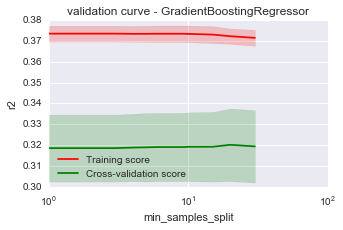

In [129]:
min_samples_split = [1,3,4,5,6,7,8,9,10,15,20,30]
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150,max_depth=2, random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train,
                             param_name='min_samples_split', param_value=min_samples_split, scoring='r2')

Best: 0.328267 using {'min_samples_leaf': 5}
0.327199 (0.029590) with: {'min_samples_leaf': 1}
0.327199 (0.029590) with: {'min_samples_leaf': 2}
0.327199 (0.029590) with: {'min_samples_leaf': 3}
0.327450 (0.029502) with: {'min_samples_leaf': 4}
0.328267 (0.029504) with: {'min_samples_leaf': 5}
0.327619 (0.029832) with: {'min_samples_leaf': 7}
Validation Curves Runtime: 11 seconds
min_samples_leaf:       1    Train Score: 0.373 Test Score: 0.319
min_samples_leaf:       2    Train Score: 0.373 Test Score: 0.319
min_samples_leaf:       3    Train Score: 0.373 Test Score: 0.320
min_samples_leaf:       4    Train Score: 0.372 Test Score: 0.321
min_samples_leaf:       5    Train Score: 0.372 Test Score: 0.321
min_samples_leaf:       7    Train Score: 0.371 Test Score: 0.320


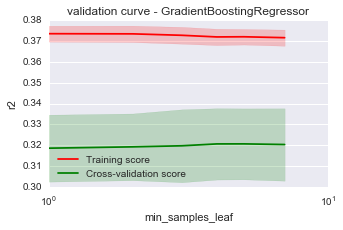

In [130]:
min_samples_leaf = [1,2,3,4,5,7]
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150,max_depth=2, min_samples_split=1, random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='min_samples_leaf',
                             param_value=min_samples_leaf, scoring='r2')

Best: 0.330296 using {'subsample': 0.9}
0.311867 (0.036613) with: {'subsample': 0.1}
0.325808 (0.034029) with: {'subsample': 0.3}
0.328142 (0.032274) with: {'subsample': 0.5}
0.326551 (0.033406) with: {'subsample': 0.6}
0.326164 (0.033630) with: {'subsample': 0.7}
0.326193 (0.031754) with: {'subsample': 0.75}
0.327742 (0.031360) with: {'subsample': 0.8}
0.330296 (0.031128) with: {'subsample': 0.9}
0.328267 (0.029504) with: {'subsample': 1.0}
Validation Curves Runtime: 16 seconds
subsample:       0    Train Score: 0.360 Test Score: 0.308
subsample:       0    Train Score: 0.374 Test Score: 0.318
subsample:       0    Train Score: 0.377 Test Score: 0.322
subsample:       0    Train Score: 0.377 Test Score: 0.322
subsample:       0    Train Score: 0.377 Test Score: 0.324
subsample:       0    Train Score: 0.377 Test Score: 0.324
subsample:       0    Train Score: 0.376 Test Score: 0.324
subsample:       0    Train Score: 0.376 Test Score: 0.323
subsample:       1    Train Score: 0.372 Tes

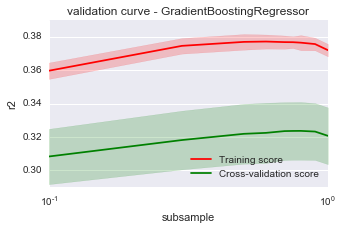

In [131]:
subsample = [0.1,0.3,0.5,0.6,0.7,0.75,0.8,0.9,1.0]
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, max_depth=2, min_samples_split=1,
                                  min_samples_leaf=5, random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='subsample',
                             param_value=subsample, scoring='r2')

In [133]:
param_grid = {'learning_rate'     : [0.1, 0.15],
              'n_estimators'      : [100, 150,200],
              'max_features'      : ['auto','sqrt','log2'],
              'max_depth'         : [1,2,3,4],
              'min_samples_split' : [1,2,3],
              'min_samples_leaf'  : [4,5,7],
              'subsample'         : [0.8, 0.9, 1.0],
              'random_state'      : [7]}

model = GradientBoostingRegressor()
select_hyperparams(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                   model=model, name='Random Forests', param_grid=param_grid, scoring_func='r2')

GridSearchCV Runtime: 1649 seconds
All CV Scores: [ 0.36450042  0.29368952  0.32138558  0.37397289  0.30328877]
Mean CV Score: 0.331 +/- 0.032
Best Estimator:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=1, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=7,
             subsample=0.9, verbose=0, warm_start=False)


#### Hyperparameters for Support Vector Regressor
* C
* epsilon

Best: 0.320095 using {'C': 3}
0.318443 (0.028236) with: {'C': 1}
0.320074 (0.032096) with: {'C': 2}
0.320095 (0.033762) with: {'C': 3}
0.319899 (0.034601) with: {'C': 4}
0.319845 (0.035381) with: {'C': 5}
Validation Curves Runtime: 28 seconds
C:       1    Train Score: 0.335 Test Score: 0.312
C:       2    Train Score: 0.339 Test Score: 0.314
C:       3    Train Score: 0.340 Test Score: 0.315
C:       4    Train Score: 0.340 Test Score: 0.314
C:       5    Train Score: 0.340 Test Score: 0.314


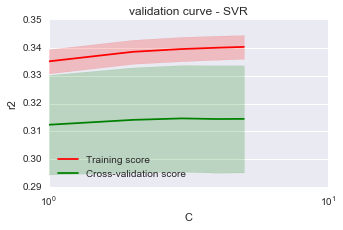

In [145]:
model = SVR(kernel='linear')
C = [1, 2, 3, 4, 5]
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='C', param_value=C, scoring='r2')

Best: 0.321328 using {'epsilon': 4.8329302385717519}
0.321096 (0.037725) with: {'epsilon': 0.10000000000000001}
0.321120 (0.037714) with: {'epsilon': 0.12742749857031338}
0.321122 (0.037705) with: {'epsilon': 0.16237767391887217}
0.321079 (0.037695) with: {'epsilon': 0.20691380811147897}
0.321120 (0.037720) with: {'epsilon': 0.26366508987303583}
0.321091 (0.037685) with: {'epsilon': 0.33598182862837817}
0.321149 (0.037613) with: {'epsilon': 0.42813323987193935}
0.321213 (0.037613) with: {'epsilon': 0.5455594781168519}
0.321236 (0.037625) with: {'epsilon': 0.69519279617756047}
0.321113 (0.037615) with: {'epsilon': 0.88586679041008254}
0.321114 (0.037765) with: {'epsilon': 1.1288378916846888}
0.321235 (0.037824) with: {'epsilon': 1.4384498882876631}
0.321186 (0.037885) with: {'epsilon': 1.8329807108324356}
0.321147 (0.037944) with: {'epsilon': 2.3357214690901213}
0.321032 (0.038338) with: {'epsilon': 2.9763514416313175}
0.321137 (0.038137) with: {'epsilon': 3.7926901907322499}
0.321328 (

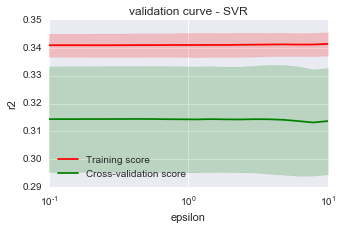

In [114]:
epsilon = np.logspace(-1,1,20)
model = SVR(kernel='linear', C=10)
grid_search_validation_curve(model, X_train, y_train, param_name='epsilon', param_value=epsilon, scoring='r2')

#### Hyperparameters for Bayesian Ridge
* alpha_1
* alpha_2

Best: 0.321943 using {'alpha_2': 1000.0}
0.321943 (0.032131) with: {'alpha_2': 0.001}
0.321943 (0.032131) with: {'alpha_2': 0.01}
0.321943 (0.032131) with: {'alpha_2': 0.10000000000000001}
0.321943 (0.032131) with: {'alpha_2': 1.0}
0.321943 (0.032131) with: {'alpha_2': 10.0}
0.321943 (0.032131) with: {'alpha_2': 100.0}
0.321943 (0.032131) with: {'alpha_2': 1000.0}
Validation Curves Runtime: 4 seconds
alpha_2:       0    Train Score: 0.344 Test Score: 0.319
alpha_2:       0    Train Score: 0.344 Test Score: 0.319
alpha_2:       0    Train Score: 0.344 Test Score: 0.319
alpha_2:       1    Train Score: 0.344 Test Score: 0.319
alpha_2:      10    Train Score: 0.344 Test Score: 0.319
alpha_2:     100    Train Score: 0.344 Test Score: 0.319
alpha_2:    1000    Train Score: 0.344 Test Score: 0.319


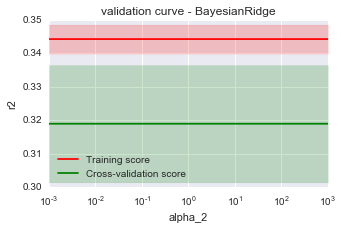

In [95]:
model = BayesianRidge()
alpha_2 = np.logspace(-3,3,7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='alpha_2', param_value=alpha_2, scoring='r2')

#### Hyperparameters for Random Forest Regressor
* n_estimators
* max_features
* max_depth
* min_samples_split
* min_samples_leaf

Best: 0.211092 using {'n_estimators': 550}
0.195199 (0.044218) with: {'n_estimators': 50}
0.203659 (0.043777) with: {'n_estimators': 100}
0.207885 (0.043315) with: {'n_estimators': 150}
0.209082 (0.043000) with: {'n_estimators': 200}
0.209180 (0.042837) with: {'n_estimators': 250}
0.209635 (0.043795) with: {'n_estimators': 300}
0.209981 (0.043033) with: {'n_estimators': 350}
0.209803 (0.042813) with: {'n_estimators': 400}
0.210132 (0.042897) with: {'n_estimators': 450}
0.210819 (0.042459) with: {'n_estimators': 500}
0.211092 (0.042233) with: {'n_estimators': 550}
Validation Curves Runtime: 261 seconds
n_estimators:      50    Train Score: 0.804 Test Score: 0.197
n_estimators:     100    Train Score: 0.807 Test Score: 0.205
n_estimators:     150    Train Score: 0.809 Test Score: 0.206
n_estimators:     200    Train Score: 0.809 Test Score: 0.207
n_estimators:     250    Train Score: 0.810 Test Score: 0.208
n_estimators:     300    Train Score: 0.810 Test Score: 0.209
n_estimators:     3

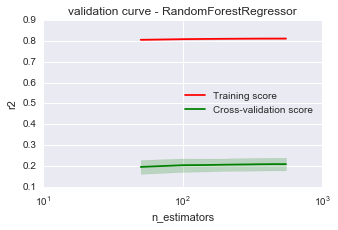

In [120]:
n_estimators = range(50, 600, 50)
model = RandomForestRegressor(random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='n_estimators', param_value=n_estimators, scoring='r2')

Best: 0.308524 using {'max_depth': 7}
0.127192 (0.023863) with: {'max_depth': 1}
0.203709 (0.018233) with: {'max_depth': 2}
0.247276 (0.013761) with: {'max_depth': 3}
0.272838 (0.016695) with: {'max_depth': 4}
0.292241 (0.020002) with: {'max_depth': 5}
0.304405 (0.023285) with: {'max_depth': 6}
0.308524 (0.026254) with: {'max_depth': 7}
0.306682 (0.027842) with: {'max_depth': 8}
0.300961 (0.029974) with: {'max_depth': 9}
0.294240 (0.031563) with: {'max_depth': 10}
Validation Curves Runtime: 211 seconds
max_depth:       1    Train Score: 0.136 Test Score: 0.112
max_depth:       2    Train Score: 0.218 Test Score: 0.191
max_depth:       3    Train Score: 0.272 Test Score: 0.236
max_depth:       4    Train Score: 0.312 Test Score: 0.263
max_depth:       5    Train Score: 0.354 Test Score: 0.280
max_depth:       6    Train Score: 0.397 Test Score: 0.291
max_depth:       7    Train Score: 0.444 Test Score: 0.296
max_depth:       8    Train Score: 0.492 Test Score: 0.297
max_depth:       9  

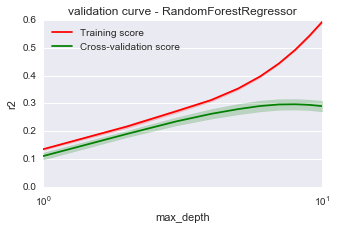

In [121]:
max_depth = range(1, 11)
model = RandomForestRegressor(n_estimators=550, random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='max_depth', param_value=max_depth, scoring='r2')

Best: 0.307973 using {'min_samples_split': 10}
0.307973 (0.025191) with: {'min_samples_split': 10}
0.307036 (0.023946) with: {'min_samples_split': 30}
0.306324 (0.023008) with: {'min_samples_split': 40}
0.305798 (0.022540) with: {'min_samples_split': 50}
0.304347 (0.022275) with: {'min_samples_split': 60}
Validation Curves Runtime: 96 seconds
min_samples_split:      10    Train Score: 0.428 Test Score: 0.294
min_samples_split:      30    Train Score: 0.400 Test Score: 0.294
min_samples_split:      40    Train Score: 0.389 Test Score: 0.294
min_samples_split:      50    Train Score: 0.381 Test Score: 0.293
min_samples_split:      60    Train Score: 0.376 Test Score: 0.292


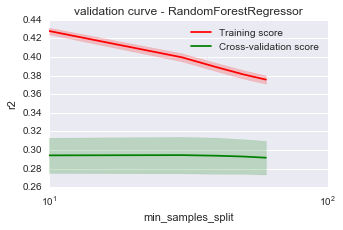

In [124]:
min_samples_split = [1,3,4,5,6,7,8,9,10,15,20,30]
model = RandomForestRegressor(n_estimators=550, max_depth=7, random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='min_samples_split',
                             param_value=min_samples_split, scoring='r2')

In [ ]:
min_samples_split = range(1, 11)
model = RandomForestRegressor(n_estimators=550,  max_depth=7, max_features random_state=7)
grid_search_validation_curve(model, X_train[selected_features], y_train, param_name='max_depth', param_value=max_depth, scoring='r2')

In [125]:
param_grid = {'n_estimators'      : [550],
              'max_depth'         : [6, 7,8],
              'min_samples_split' : [6, 7,8],
              'min_samples_leaf'  : [4, 5],
              'random_state'      : [0]}

model = RandomForestRegressor()
select_hyperparams(X_train=X_train[selected_features], y_train=y_train, X_test=X_test[selected_features], y_test=y_test,
                   model=model, name='Random Forests', param_grid=param_grid, scoring_func='r2')

GridSearchCV Runtime: 381 seconds
All CV Scores: [ 0.31957935  0.27696468  0.29709212  0.33984643  0.29550936]
Mean CV Score: 0.306 +/- 0.022
Best Estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=4,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           n_estimators=550, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)


In [ ]:
n_estimators = range(50, 600, 50)
model = RandomForestRegressor(max_depth=3)
grid_search_validation_curve(model, X_train, y_train, param_name='n_estimators', param_value=n_estimators, scoring='r2')

In [ ]:
max_depth = range(1, 11)
model = RandomForestRegressor(n_estimators=400)
grid_search_validation_curve(model, X_train, y_train, param_name='max_depth', param_value=max_depth, scoring='r2')

# 4. Results

## Model Evaluation and Validation

Best Estimator:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=1, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=7,
             subsample=0.9, verbose=0, warm_start=False)

In [138]:
model = GradientBoostingRegressor(learning_rate=0.15, max_depth=2, max_features='log2',
                                 min_samples_leaf=5, n_estimators=200, random_state=7, subsample=0.9)
model.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
r2 = r2_score(y_test, model.predict(X_test))   
           
print "RMSE: %.2f r2 score: %.2f" % (rmse, r2 )


RMSE: 76.14 r2 score: 0.36


## Justification

# 5. Conclusion

## Free-Form Visualization

## Reflection

## Improvement